In [2]:
import torch
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from PIL import Image
import glob
print(torch.__version__)
print(torch.cuda.is_available())
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

1.8.1+cu101
True


device(type='cuda', index=0)

## 加载数据

In [3]:
all_imgs_path = glob.glob(r"../小型CSV数据/dataset2/*.jpg")
weather_species = ["cloudy", "rain", "shine", "sunrise"]
weather_species_to_idx = dict((c, i) for i, c in enumerate(weather_species))
idx_to_weather_species = dict((v, k) for k, v in weather_species_to_idx.items())
all_lables = []
for img_path in all_imgs_path:
    for i, c in enumerate(weather_species_to_idx):
        if c in img_path:
            all_lables.append(i)

In [22]:
# 创建一个长度为len(all_imgs_path)的乱序index序列
index = np.random.permutation(len(all_imgs_path))
all_imgs_path = np.array(all_imgs_path)[index]
all_lables = np.array(all_lables)[index]

# 设置训练集的数据量
data_split_nums = int(len(all_imgs_path) * 0.8)
train_images = all_imgs_path[:data_split_nums]
train_labels = all_lables[:data_split_nums]
test_images = all_imgs_path[data_split_nums:]
test_lables = all_lables[data_split_nums:]

In [18]:
transform_op = torchvision.transforms.Compose([
                    torchvision.transforms.Resize(size=(96, 96)),
                    torchvision.transforms.ToTensor()])

class MyDataset(torch.utils.data.Dataset):
    def __init__(self, imgs_path_list, labels_list, transform_op):
        self.imgs_path_list = imgs_path_list
        self.labels_list = labels_list
        self.transform_op = transform_op

    def __getitem__(self, index):
        img_path = self.imgs_path_list[index]
        label = self.labels_list[index]
        pil_image = Image.open(img_path)
        img_data = self.transform_op(pil_image)
        return img_data, label

    def __len__(self):
        return len(self.imgs_path_list)

In [23]:
train_dataset = MyDataset(train_images, train_labels, transform_op)
test_dataset = MyDataset(test_images, test_lables, transform_op)

traindata_loader = torch.utils.data.DataLoader(train_dataset, 
                                               batch_size=16,
                                               shuffle=True)
testdata_loader = torch.utils.data.DataLoader(test_dataset, 
                                              batch_size=16)

In [ ]:
# ----------------------------------------------------------------------

In [7]:
weather_data = MyDataset(all_imgs_path, all_lables, transform_op)
weather_data_loader = torch.utils.data.DataLoader(weather_data, 
                                                  batch_size=16,
                                                  shuffle=True)

In [10]:
imgs_batch, labels_batch = next(iter(weather_data_loader))
imgs_batch.shape

torch.Size([16, 3, 96, 96])

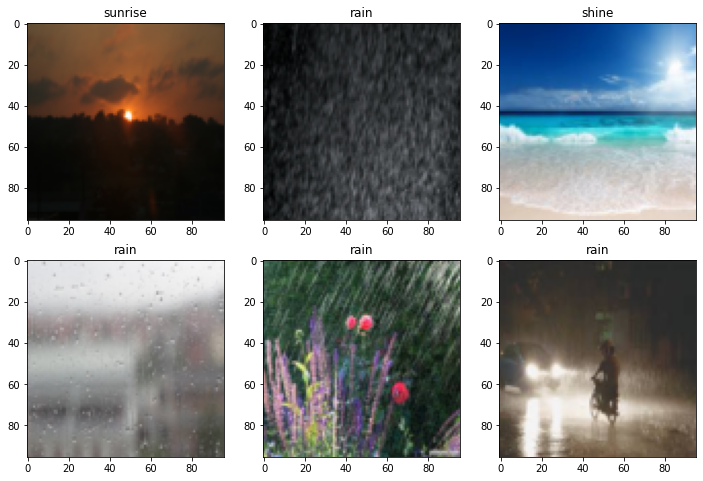

In [12]:
plt.figure(figsize=(12, 8))
for i, (img, label) in enumerate(zip(imgs_batch[:6], labels_batch[:6])):
    img = img.permute(1, 2, 0).numpy()
    plt.subplot(2, 3, i+1)
    plt.title(idx_to_weather_species[label.item()])
    plt.imshow(img)

In [ ]:
# -------------------------------------------------------------

In [24]:
class New_Dataset(torch.utils.data.Dataset):
    def __init__(self, some_dataset):
        self.some_dataset = some_dataset
    
    def __getitem__(self, index):
        img, label = self.some_dataset[index]
        img = img.permute(1, 2, 0)
        return img, label

    def __len__(self):
        return len(self.some_dataset)

In [27]:
train_new_dataset = New_Dataset(train_dataset)
img, label = train_new_dataset[2]
img.shape # 灵活使用子类的方式对输入图片的shape维度进行转换

torch.Size([96, 96, 3])